# Modelo Preditivo Premier League

In [1]:
from selenium import webdriver
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
import mysql.connector as mdb
import unicodedata

## 1ª Parte: Scrapping

In [2]:
con = mdb.connect(user='root', password ='113283Tt&', database='transfermarkt')

In [3]:
con

In [4]:
cursor = con.cursor()

In [5]:
cursor

In [6]:
html_plm = "https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=20"

In [7]:
def cap_html(x):
    f = html_plm + str(0) + str(x)
    return f

In [8]:
l0 = []
for x in range(0,10):
    l0.append(cap_html(x))

In [9]:
l0

['https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=2000',
 'https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=2001',
 'https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=2002',
 'https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=2003',
 'https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=2004',
 'https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=2005',
 'https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=2006',
 'https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=2007',
 'https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=2008',
 'https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=2009']

In [10]:
def cap_html1(x):
    f = html_plm + str(x)
    return f

In [11]:
l1 = []
for x in range(10,22):
    l1.append(cap_html1(x))

In [12]:
l1

['https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=2010',
 'https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=2011',
 'https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=2012',
 'https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=2013',
 'https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=2014',
 'https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=2015',
 'https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=2016',
 'https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=2017',
 'https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=2018',
 'https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=2019',
 'https://www.transf

In [13]:
l1[10]

'https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1?saison_id=2020'

In [23]:
x = l1[10]
driver = webdriver.Chrome()
driver.get(x)
h = driver.page_source
soup = BeautifulSoup(h, 'lxml')
driver.quit()
for i in range(0,380):
    fields = {}
    m = soup.find_all('td', attrs={'class' :  'text-right no-border-rechts hauptlink'})
    r = soup.find_all('td', attrs={'class' :  'zentriert hauptlink'})
    v = soup.find_all('td', attrs={'class' :  'no-border-links hauptlink'})
    mandante = m[i].text
    resultado = r[i].text
    visitante = v[i].text
    fields["Mandante"] = mandante
    fields["Resultado"] = resultado
    fields["Visitante"] = visitante
    insertstrfmkt=("INSERT INTO partidaspl20 (mandante, resultado, visitante) values ('%s', '%s', '%s')" % (mandante, resultado, visitante))
    cursor.execute(insertstrfmkt)

In [24]:
con.commit()

In [25]:
cursor.execute("SELECT * FROM partidaspl20")

In [26]:
p1 = cursor.fetchall()

In [27]:
p1

[('(19.)\xa0\xa0FC Fulham', '\xa00:3\xa0', 'FC Arsenal\xa0\xa0(1.)'),
 ('(8.)\xa0\xa0Crystal Palace', '\xa01:0\xa0', 'FC Southampton\xa0\xa0(13.)'),
 ('(7.)\xa0\xa0FC Liverpool', '\xa04:3\xa0', 'Leeds\xa0\xa0(11.)'),
 ('(18.)\xa0\xa0West Ham ', '\xa00:2\xa0', 'Newcastle \xa0\xa0(5.)'),
 ('(20.)\xa0\xa0West Brom', '\xa00:3\xa0', 'Leicester\xa0\xa0(2.)'),
 ('(14.)\xa0\xa0Tottenham', '\xa00:1\xa0', 'Everton\xa0\xa0(9.)'),
 ('(17.)\xa0\xa0Sheff Utd', '\xa00:2\xa0', 'Wolves\xa0\xa0(6.)'),
 ('(15.)\xa0\xa0Brighton', '\xa01:3\xa0', 'Chelsea\xa0\xa0(3.)'),
 ('(12.)\xa0\xa0FC Burnley', '\xa00:1\xa0', 'Man Utd.\xa0\xa0(10.)'),
 ('(4.)\xa0\xa0Manchester City', '\xa02:0\xa0', 'Aston Villa\xa0\xa0(16.)'),
 ('(9.)\xa0\xa0Everton', '\xa05:2\xa0', 'West Brom\xa0\xa0(20.)'),
 ('(11.)\xa0\xa0Leeds', '\xa04:3\xa0', 'FC Fulham\xa0\xa0(19.)'),
 ('(10.)\xa0\xa0Man Utd.', '\xa01:3\xa0', 'Crystal Palace\xa0\xa0(8.)'),
 ('(1.)\xa0\xa0FC Arsenal', '\xa02:1\xa0', 'West Ham \xa0\xa0(18.)'),
 ('(13.)\xa0\xa0FC Sou

In [14]:
import pandas as pd
def read_table(table):
    query = "SELECT * FROM " + table
    return pd.read_sql(query,con)

In [29]:
partidas_pl20 = read_table('partidaspl20')

In [30]:
partidas_pl20

,mandante,resultado,visitante
0,(19.) FC Fulham,0:3,FC Arsenal (1.)
1,(8.) Crystal Palace,1:0,FC Southampton (13.)
2,(7.) FC Liverpool,4:3,Leeds (11.)
3,(18.) West Ham,0:2,Newcastle (5.)
4,(20.) West Brom,0:3,Leicester (2.)
...,...,...,...
375,(4.) FC Liverpool,2:0,Crystal Palace (13.)
376,(1.) Manchester City,5:0,Everton (8.)
377,(20.) Sheff Utd,1:0,FC Burnley (17.)
378,(6.) West Ham,3:0,FC Southampton (14.)


In [33]:
url = 'https://www.transfermarkt.com.br/spieler-statistik/wertvollstemannschaften/marktwertetop'
driver = webdriver.Chrome()
driver.get(url)
h = driver.page_source
soup = BeautifulSoup(h, 'lxml')
driver.quit()

In [18]:
soup.find_all('img', attrs={'class' : 'tiny_wappen'})[0]['alt']

'Manchester City FC'

In [40]:
len(soup.find_all('img', attrs={'class' :  'flaggenrahmen'}))

25

In [44]:
r = soup.find_all('td', attrs={'class' :  'rechts'})

In [45]:
r

[<td class="rechts"><b>977,30 mi. €</b><span class="icons_sprite red-arrow-ten"> </span></td>,
 <td class="rechts"><b>909,55 mi. €</b><span class="icons_sprite red-arrow-ten"> </span></td>,
 <td class="rechts"><b>889,00 mi. €</b><span class="icons_sprite green-arrow-ten"> </span></td>,
 <td class="rechts"><b>883,00 mi. €</b><span class="icons_sprite red-arrow-ten"> </span></td>,
 <td class="rechts"><b>815,25 mi. €</b><span class="icons_sprite red-arrow-ten"> </span></td>,
 <td class="rechts"><b>790,25 mi. €</b><span class="icons_sprite red-arrow-ten"> </span></td>,
 <td class="rechts"><b>780,00 mi. €</b><span class="icons_sprite green-arrow-ten"> </span></td>,
 <td class="rechts"><b>651,00 mi. €</b><span class="icons_sprite green-arrow-ten"> </span></td>,
 <td class="rechts"><b>646,50 mi. €</b><span class="icons_sprite green-arrow-ten"> </span></td>,
 <td class="rechts"><b>580,25 mi. €</b><span class="icons_sprite red-arrow-ten"> </span></td>,
 <td class="rechts"><b>576,30 mi. €</b><sp

In [46]:
del(r)[25:30]

In [57]:
len(r)

25

In [43]:
del(soup.find_all('td', attrs={'class' :  'rechts'})[25:30])

In [14]:
cursor.execute("CREATE TABLE top25teammarketvalues (team TEXT NOT NULL, country TEXT NOT NULL, value TEXT NOT NULL)")

In [42]:
url = 'https://www.transfermarkt.com.br/spieler-statistik/wertvollstemannschaften/marktwertetop'
driver = webdriver.Chrome()
driver.get(url)
h = driver.page_source
soup = BeautifulSoup(h, 'lxml')
driver.quit()
t = soup.find_all('img', attrs={'class' : 'tiny_wappen'})
c = soup.find_all('img', attrs={'class' :  'flaggenrahmen'})
v = soup.find_all('td', attrs={'class' :  'rechts'})
del(v)[25:30]
for i in range(0,25):
    fields = {}
    team = t[i]['alt']
    country = c[i]['alt']
    value = v[i].text
    if ',' in value:
        value = value.replace(",",".")
    if ' mi. €\xa0' in value:
        value = str(int(float(value.replace(" mi. €\xa0",""))*1000000))
    fields["Time"] = team
    fields["País"] = country
    fields["Valores"] = value
    insertstrfmkt=("INSERT INTO top25teammarketvalues (team, country, value) values ('%s', '%s', '%s')" % (team, country, value))
    cursor.execute(insertstrfmkt)

In [43]:
con.commit()

In [15]:
cursor.execute("SELECT * FROM top25teammarketvalues")

In [16]:
p2 = cursor.fetchall()

In [17]:
p2

[('Manchester City FC', 'Inglaterra', '977300000'),
 ('FC Paris Saint-Germain', 'França', '909550000'),
 ('FC Liverpool', 'Inglaterra', '889000000'),
 ('Chelsea FC', 'Inglaterra', '883000000'),
 ('FC Bayern de Munique', 'Alemanha', '815250000'),
 ('Manchester United FC', 'Inglaterra', '790250000'),
 ('Real Madrid CF', 'Espanha', '780000000'),
 ('FC Barcelona', 'Espanha', '651000000'),
 ('Atlético de Madrid', 'Espanha', '646500000'),
 ('Tottenham Hotspur ', 'Inglaterra', '580250000'),
 ('Borussia Dortmund', 'Alemanha', '576300000'),
 ('Juventus FC', 'Itália', '566400000'),
 ('Inter de Milão', 'Itália', '550900000'),
 ('Leicester City FC', 'Inglaterra', '513799999'),
 ('FC Arsenal', 'Inglaterra', '511000000'),
 ('Nápoles', 'Itália', '505850000'),
 ('AC Milan', 'Itália', '466600000'),
 ('RB Leipzig', 'Alemanha', '454000000'),
 ('FC Everton', 'Inglaterra', '453750000'),
 ('Aston Villa FC', 'Inglaterra', '426500000'),
 ('Sevilla FC', 'Espanha', '424900000'),
 ('Bayer 04 Leverkusen', 'Aleman

In [18]:
top25 = read_table('top25teammarketvalues')
top25

,team,country,value
0,Manchester City FC,Inglaterra,977300000
1,FC Paris Saint-Germain,França,909550000
2,FC Liverpool,Inglaterra,889000000
3,Chelsea FC,Inglaterra,883000000
4,FC Bayern de Munique,Alemanha,815250000
5,Manchester United FC,Inglaterra,790250000
6,Real Madrid CF,Espanha,780000000
7,FC Barcelona,Espanha,651000000
8,Atlético de Madrid,Espanha,646500000
9,Tottenham Hotspur,Inglaterra,580250000


In [19]:
con.close()
cursor.close()

True

## 2ª Parte: Manipulação e Visualização de Dados

In [20]:
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
#from pandas.plotting import scatter_matrix
#from scipy.stats import norm
#import numpy as np
import seaborn as sns
import itertools
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature

In [21]:
top25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   team     25 non-null     object
 1   country  25 non-null     object
 2   value    25 non-null     object
dtypes: object(3)
memory usage: 728.0+ bytes


In [29]:
cols_int = ["value"]

top25[cols_int] = top25[cols_int].astype(int)

In [30]:
top25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   team     25 non-null     object
 1   country  25 non-null     object
 2   value    25 non-null     int32 
dtypes: int32(1), object(2)
memory usage: 628.0+ bytes


In [31]:
top25

,team,country,value
0,Manchester City FC,Inglaterra,977300000
1,FC Paris Saint-Germain,França,909550000
2,FC Liverpool,Inglaterra,889000000
3,Chelsea FC,Inglaterra,883000000
4,FC Bayern de Munique,Alemanha,815250000
5,Manchester United FC,Inglaterra,790250000
6,Real Madrid CF,Espanha,780000000
7,FC Barcelona,Espanha,651000000
8,Atlético de Madrid,Espanha,646500000
9,Tottenham Hotspur,Inglaterra,580250000


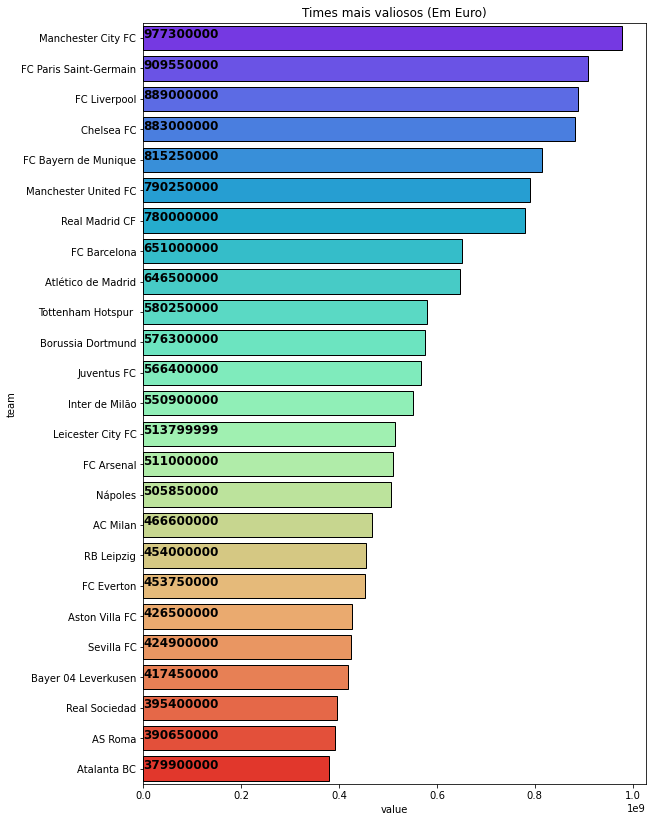

In [34]:
plt.figure(figsize=(9,14))
ax = sns.barplot(x="value",y="team",
                 data=top25,palette="rainbow",
                linewidth = 1,edgecolor = ['k' for i in range(0,30)])

for i,j in enumerate(top25["value"][:25]):
    ax.text(20,i,j,weight="bold",color = "k",fontsize =12)

plt.title("Times mais valiosos (Em Euro)")
plt.show()

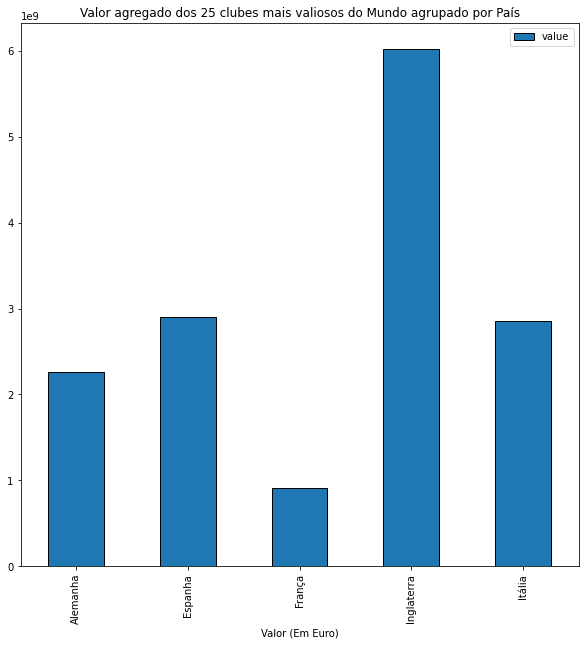

In [36]:
top25.groupby("country").agg({"value":"sum"}).plot(kind="bar",  # Ex: data.groupby("league").agg({"home_team_goal":"sum","away_team_goal":"sum"})
                                                                                 figsize = (10,10),
                                                                                 edgecolor = "k",
                                                                                 linewidth =1
                                                                                )

plt.title("Valor agregado dos 25 clubes mais valiosos do Mundo agrupado por País")
plt.xlabel("Valor (Em Euro)")
plt.show()

In [ ]:
for x in (l0):
    fields = {}
    driver = webdriver.Chrome()
    driver.get(x)
    h = driver.page_source
    soup = BeautifulSoup(h, 'lxml')
    driver.quit()
    for i in range(0,380):
        fields = {}
        driver = webdriver.Chrome()
        driver.get(x)
        h = driver.page_source
        soup = BeautifulSoup(h, 'lxml')
        driver.quit()
        m = soup.find_all('td', attrs={'class' :  'text-right no-border-rechts hauptlink'})
        r = soup.find_all('td', attrs={'class' :  'zentriert hauptlink'})
        v = soup.find_all('td', attrs={'class' :  'no-border-links hauptlink'})
        mandante = m[i].text
        resultado = r[i].text
        visitante = v[i].text
        fields["Mandante"] = mandante
        fields["Resultado"] = resultado
        fields["Visitante"] = visitante
        for j in range(0,10):
            #insert('transfermarkt', fields)
            insertstrfmkt=("INSERT INTO partidaspl0" + str(j) + " (mandante, resultado, visitante) values ('%s', '%s', '%s')" % (mandante, resultado, visitante))
            cursor.execute(insertstrfmkt)
            #print(insertstmt)
            #print(fields)
            #print ('%s\t,%s\t' % (jogadores,valores))

In [14]:
con.commit()

In [18]:
for x in range(1,10):
    cursor.execute("DROP TABLE partidaspl0"+str(x))

In [19]:
con.commit()

In [147]:
m = []
for i in l:
    m.append(cap_soup(i))

In [148]:
m

[[<td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(6.)</span>  <a href="/fc-brentford/spielplan/verein/1148/saison_id/2021" title="Brentford FC">Brentford</a></td>,
  <td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(1.)</span>  <a href="/manchester-united/spielplan/verein/985/saison_id/2021" title="Manchester United FC">Man Utd.</a></td>,
  <td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(12.)</span>  <a href="/fc-burnley/spielplan/verein/1132/saison_id/2021" title="FC Burnley">FC Burnley</a></td>,
  <td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(2.)</span>  <a href="/fc-chelsea/spielplan/verein/631/saison_id/2021" title="Chelsea FC">Chelsea</a></td>,
  <td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(5.)</span>  <a href="/fc-everton/spielplan/verein/29/saison_id/2021" title="FC Everton">Everton</a></td>,
  <td class="text-right no-bord

In [151]:
len(m[0])

380

In [124]:
len(mpl_html)

634018

In [121]:
m

[<td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(6.)</span>  <a href="/fc-brentford/spielplan/verein/1148/saison_id/2021" title="Brentford FC">Brentford</a></td>,
 <td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(1.)</span>  <a href="/manchester-united/spielplan/verein/985/saison_id/2021" title="Manchester United FC">Man Utd.</a></td>,
 <td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(12.)</span>  <a href="/fc-burnley/spielplan/verein/1132/saison_id/2021" title="FC Burnley">FC Burnley</a></td>,
 <td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(2.)</span>  <a href="/fc-chelsea/spielplan/verein/631/saison_id/2021" title="Chelsea FC">Chelsea</a></td>,
 <td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(5.)</span>  <a href="/fc-everton/spielplan/verein/29/saison_id/2021" title="FC Everton">Everton</a></td>,
 <td class="text-right no-border-rec

In [122]:
len(m)

380

In [53]:
def cap_soup(x):
    m = soup.find_all('td', attrs={'class' :  'text-right no-border-rechts hauptlink'})
    return m

In [54]:
cap_soup(mpl)

([<td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(6.)</span>  <a href="/fc-brentford/spielplan/verein/1148/saison_id/2021" title="Brentford FC">Brentford</a></td>,
  <td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(1.)</span>  <a href="/manchester-united/spielplan/verein/985/saison_id/2021" title="Manchester United FC">Man Utd.</a></td>,
  <td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(12.)</span>  <a href="/fc-burnley/spielplan/verein/1132/saison_id/2021" title="FC Burnley">FC Burnley</a></td>,
  <td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(2.)</span>  <a href="/fc-chelsea/spielplan/verein/631/saison_id/2021" title="Chelsea FC">Chelsea</a></td>,
  <td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(5.)</span>  <a href="/fc-everton/spielplan/verein/29/saison_id/2021" title="FC Everton">Everton</a></td>,
  <td class="text-right no-bord

In [20]:
def create_table0(x):
    query1 = "CREATE TABLE partidaspl" + str(0) + str(x) + " (mandante TEXT NOT NULL, resultado TEXT NOT NULL, visitante TEXT NOT NULL)"
    return cursor.execute(query1)

In [29]:
def create_table1(x):
    query1 = "CREATE TABLE partidaspl" + str(x) + " (mandante TEXT NOT NULL, resultado TEXT NOT NULL, visitante TEXT NOT NULL)"
    return cursor.execute(query1)

In [21]:
for x in range(0,10):
    create_table0(x)

In [38]:
for x in range(10,22):
    create_table1(x)

In [ ]:
def data_add(x):
    query2 = "INSERT INTO partidaspl" + str(x) + " (mandante, resultado, visitante) values ('%s', '%s', '%s')" % (mandante, resultado, visitante)
    return cursor.execute(query2)

In [22]:
mpl = "https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1/saison_id/2021"

In [145]:
cap_soup(mpl)

[<td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(6.)</span>  <a href="/fc-brentford/spielplan/verein/1148/saison_id/2021" title="Brentford FC">Brentford</a></td>,
 <td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(1.)</span>  <a href="/manchester-united/spielplan/verein/985/saison_id/2021" title="Manchester United FC">Man Utd.</a></td>,
 <td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(12.)</span>  <a href="/fc-burnley/spielplan/verein/1132/saison_id/2021" title="FC Burnley">FC Burnley</a></td>,
 <td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(2.)</span>  <a href="/fc-chelsea/spielplan/verein/631/saison_id/2021" title="Chelsea FC">Chelsea</a></td>,
 <td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(5.)</span>  <a href="/fc-everton/spielplan/verein/29/saison_id/2021" title="FC Everton">Everton</a></td>,
 <td class="text-right no-border-rec

In [8]:
mpl

'https://www.transfermarkt.com.br/premier-league/gesamtspielplan/wettbewerb/GB1/saison_id/2021'

In [9]:
driver = webdriver.Chrome()

In [126]:
driver.get(mpl)

In [131]:
mpl_html = driver.page_source

In [128]:
mpl_html

'<html class="sp-message-open hydrated" lang="br" style="display: block;"><head>\n    \n<script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script type="text/javascript">\n    !function () { var e = function () { var e, t = "__tcfapiLocator", a = [], n = window; for (; n;) { try { if (n.frames[t]) { e = n; break } } catch (e) { } if (n === window.top) break; n = n.parent } e || (!function e() { var a = n.document, r = !!n.frames[t]; if (!r) if (a.body) { var i = a.createElement("iframe"); i.style.cssText = "display:none", i.name = t, a.body.appendChild(i) } else setTimeout(e, 5); return !r }(), n.__tcfapi = function () { for (var e, t = arguments.length, n = new Array(t), r = 0; r < t; r++)n[r] = arguments[r]; if (!n.length) return a; if ("setGdprApplies" === n[0]) n.length > 3 && 2 === parseInt(n[1], 10) && "boolean" == typeof n[3] && (e = n[3], "function" == typeof n[2] && n[2]("set", !0)); else if ("ping" === n[0]) { var i = { gdprAp

In [129]:
len(mpl_html)

633460

In [13]:
'Resultado' in mpl_html

True

In [14]:
mpl_soup = BeautifulSoup(mpl_html, 'lxml')

In [15]:
mpl_soup

<html class="hydrated sp-message-open" lang="br" style="display: block;"><head>
<script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script type="text/javascript">
    !function () { var e = function () { var e, t = "__tcfapiLocator", a = [], n = window; for (; n;) { try { if (n.frames[t]) { e = n; break } } catch (e) { } if (n === window.top) break; n = n.parent } e || (!function e() { var a = n.document, r = !!n.frames[t]; if (!r) if (a.body) { var i = a.createElement("iframe"); i.style.cssText = "display:none", i.name = t, a.body.appendChild(i) } else setTimeout(e, 5); return !r }(), n.__tcfapi = function () { for (var e, t = arguments.length, n = new Array(t), r = 0; r < t; r++)n[r] = arguments[r]; if (!n.length) return a; if ("setGdprApplies" === n[0]) n.length > 3 && 2 === parseInt(n[1], 10) && "boolean" == typeof n[3] && (e = n[3], "function" == typeof n[2] && n[2]("set", !0)); else if ("ping" === n[0]) { var i = { gdprApplies: e,

In [16]:
m = mpl_soup.find_all('td', attrs={'class' :  'text-right no-border-rechts hauptlink'})

In [17]:
m

[<td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(6.)</span>  <a href="/fc-brentford/spielplan/verein/1148/saison_id/2021" title="Brentford FC">Brentford</a></td>,
 <td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(1.)</span>  <a href="/manchester-united/spielplan/verein/985/saison_id/2021" title="Manchester United FC">Man Utd.</a></td>,
 <td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(12.)</span>  <a href="/fc-burnley/spielplan/verein/1132/saison_id/2021" title="FC Burnley">FC Burnley</a></td>,
 <td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(2.)</span>  <a href="/fc-chelsea/spielplan/verein/631/saison_id/2021" title="Chelsea FC">Chelsea</a></td>,
 <td class="text-right no-border-rechts hauptlink"><span class="tabellenplatz">(5.)</span>  <a href="/fc-everton/spielplan/verein/29/saison_id/2021" title="FC Everton">Everton</a></td>,
 <td class="text-right no-border-rec

In [18]:
len(m)

380

In [19]:
m[0].text

'(6.)\xa0\xa0Brentford'

In [20]:
r = mpl_soup.find_all('td', attrs={'class' :  'zentriert hauptlink'})

In [21]:
r

[<td class="zentriert hauptlink"> <a class="ergebnis-link" href="/brentford-fc_fc-arsenal/index/spielbericht/3583476" id="3583476" title="">2:0</a> </td>,
 <td class="zentriert hauptlink"> <a class="ergebnis-link" href="/manchester-united-fc_leeds-united-fc/index/spielbericht/3583481" id="3583481" title="">5:1</a> </td>,
 <td class="zentriert hauptlink"> <a class="ergebnis-link" href="/fc-burnley_brighton-albion/index/spielbericht/3583477" id="3583477" title="">1:2</a> </td>,
 <td class="zentriert hauptlink"> <a class="ergebnis-link" href="/chelsea-fc_crystal-palace-fc/index/spielbericht/3583478" id="3583478" title="">3:0</a> </td>,
 <td class="zentriert hauptlink"> <a class="ergebnis-link" href="/fc-everton_fc-southampton/index/spielbericht/3583479" id="3583479" title="">3:1</a> </td>,
 <td class="zentriert hauptlink"> <a class="ergebnis-link" href="/leicester-city-fc_wolverhampton-wanderers/index/spielbericht/3583480" id="3583480" title="">1:0</a> </td>,
 <td class="zentriert hauptli

In [22]:
len(r)

380

In [23]:
r[0].text

'\xa02:0\xa0'

In [24]:
v = mpl_soup.find_all('td', attrs={'class' :  'no-border-links hauptlink'})

In [25]:
v

[<td class="no-border-links hauptlink"><a href="/fc-arsenal/spielplan/verein/11/saison_id/2021" title="FC Arsenal">FC Arsenal</a>  <span class="tabellenplatz">(17.)</span></td>,
 <td class="no-border-links hauptlink"><a href="/leeds-united/spielplan/verein/399/saison_id/2021" title="Leeds United FC ">Leeds</a>  <span class="tabellenplatz">(20.)</span></td>,
 <td class="no-border-links hauptlink"><a href="/brighton-amp-hove-albion/spielplan/verein/1237/saison_id/2021" title="Brighton Albion">Brighton</a>  <span class="tabellenplatz">(8.)</span></td>,
 <td class="no-border-links hauptlink"><a href="/crystal-palace/spielplan/verein/873/saison_id/2021" title="Crystal Palace FC">Crystal Palace</a>  <span class="tabellenplatz">(18.)</span></td>,
 <td class="no-border-links hauptlink"><a href="/fc-southampton/spielplan/verein/180/saison_id/2021" title="FC Southampton">FC Southampton</a>  <span class="tabellenplatz">(16.)</span></td>,
 <td class="no-border-links hauptlink"><a href="/wolverhamp

In [26]:
len(v)

380

In [28]:
v[0].text

'FC Arsenal\xa0\xa0(17.)'

In [ ]:
for i in range(0,380):
    fields = {}
    mandante = m[i].text
    resultado = r[i].text
    visitante = v[i].text
    fields["Mandante"] = mandante
    fields["Resultado"] = resultado
    fields["Visitante"] = visitante
    #insert('transfermarkt', fields)
    insertstrfmkt=("INSERT INTO partidaspl2122 (mandante, resultado, visitante) values ('%s', '%s', '%s')" % (mandante, resultado, visitante))
    cursor.execute(insertstrfmkt)
    #print(insertstmt)
    #print(fields)
    #print ('%s\t,%s\t' % (jogadores,valores))

In [ ]:
con.commit()

In [29]:
cursor.execute("SELECT * FROM partidaspl2122")

In [30]:
p = cursor.fetchall()

In [31]:
p

[('(6.)\xa0\xa0Brentford', '\xa02:0\xa0', 'FC Arsenal\xa0\xa0(17.)'),
 ('(1.)\xa0\xa0Man Utd.', '\xa05:1\xa0', 'Leeds\xa0\xa0(20.)'),
 ('(12.)\xa0\xa0FC Burnley', '\xa01:2\xa0', 'Brighton\xa0\xa0(8.)'),
 ('(2.)\xa0\xa0Chelsea', '\xa03:0\xa0', 'Crystal Palace\xa0\xa0(18.)'),
 ('(5.)\xa0\xa0Everton', '\xa03:1\xa0', 'FC Southampton\xa0\xa0(16.)'),
 ('(9.)\xa0\xa0Leicester', '\xa01:0\xa0', 'Wolves\xa0\xa0(14.)'),
 ('(7.)\xa0\xa0Watford', '\xa03:2\xa0', 'Aston Villa\xa0\xa0(11.)'),
 ('(19.)\xa0\xa0Norwich', '\xa00:3\xa0', 'FC Liverpool\xa0\xa0(3.)'),
 ('(15.)\xa0\xa0Newcastle ', '\xa02:4\xa0', 'West Ham \xa0\xa0(4.)'),
 ('(10.)\xa0\xa0Tottenham', '\xa01:0\xa0', 'Manchester City\xa0\xa0(13.)'),
 ('(3.)\xa0\xa0FC Liverpool', '\xa02:0\xa0', 'FC Burnley\xa0\xa0(12.)'),
 ('(11.)\xa0\xa0Aston Villa', '\xa02:0\xa0', 'Newcastle \xa0\xa0(15.)'),
 ('(18.)\xa0\xa0Crystal Palace', '\xa00:0\xa0', 'Brentford\xa0\xa0(6.)'),
 ('(20.)\xa0\xa0Leeds', '\xa02:2\xa0', 'Everton\xa0\xa0(5.)'),
 ('(13.)\xa0\xa0Man

In [32]:
def read_table(table):
    query = "SELECT * FROM " + table
    return pd.read_sql(query,con)

In [33]:
partidas_pl2122 = read_table('partidaspl2122')

In [34]:
partidas_pl2122

,mandante,resultado,visitante
0,(6.) Brentford,2:0,FC Arsenal (17.)
1,(1.) Man Utd.,5:1,Leeds (20.)
2,(12.) FC Burnley,1:2,Brighton (8.)
3,(2.) Chelsea,3:0,Crystal Palace (18.)
4,(5.) Everton,3:1,FC Southampton (16.)
...,...,...,...
375,Manchester City,-:-,Aston Villa
376,Norwich,-:-,Tottenham
377,FC Arsenal,-:-,Everton
378,Brentford,-:-,Leeds
